In [1]:
#!/usr/bin/env python3

import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings
import pandas as pd
# from amazon_scraping.spiders.acquisitions import AcquisitionsSpider

# used just for human readable json
import json
import re

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
stop = stopwords.words('english')

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline


In [2]:
scrapy_settings = get_project_settings()
# modify scrapy_settings here if needed

output = {
          "acquisitions": {},
          "competitors": {}
         }
process = CrawlerProcess(settings=scrapy_settings)
process.crawl("acquisitions", output=output)
process.crawl("competitors", output=output)
process.start()


2019-11-22 12:35:14 [scrapy.utils.log] INFO: Scrapy 1.8.0 started (bot: amazon_scraping)
2019-11-22 12:35:14 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.10.0, Python 3.7.4 (default, Aug 13 2019, 15:17:50) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Darwin-19.0.0-x86_64-i386-64bit
2019-11-22 12:35:14 [scrapy.crawler] INFO: Overridden settings: {'BOT_NAME': 'amazon_scraping', 'NEWSPIDER_MODULE': 'amazon_scraping.spiders', 'ROBOTSTXT_OBEY': True, 'SPIDER_MODULES': ['amazon_scraping.spiders']}
2019-11-22 12:35:14 [scrapy.extensions.telnet] INFO: Telnet Password: 0fea1e56f4f5d424
2019-11-22 12:35:14 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2019-11-22 12:35:14 [scrapy.middlew

['874', '60']


2019-11-22 12:35:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Fedex> (referer: None)
2019-11-22 12:35:16 [scrapy.core.engine] INFO: Closing spider (finished)
2019-11-22 12:35:16 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 1868,
 'downloader/request_count': 5,
 'downloader/request_method_count/GET': 5,
 'downloader/response_bytes': 217929,
 'downloader/response_count': 5,
 'downloader/response_status_count/200': 5,
 'elapsed_time_seconds': 1.615982,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2019, 11, 22, 20, 35, 16, 635635),
 'log_count/DEBUG': 9,
 'log_count/INFO': 19,
 'memusage/max': 182435840,
 'memusage/startup': 182435840,
 'request_depth_max': 1,
 'response_received_count': 5,
 'robotstxt/request_count': 1,
 'robotstxt/response_count': 1,
 'robotstxt/response_status_count/200': 1,
 'scheduler/dequeued': 4,
 'scheduler/dequeued/memory': 4,
 'scheduler/enqueued': 4,
 'scheduler/enqueued/m

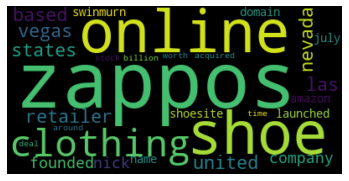

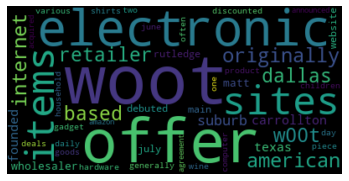

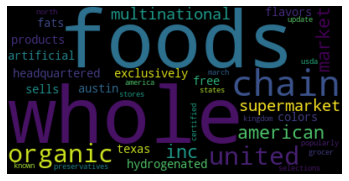

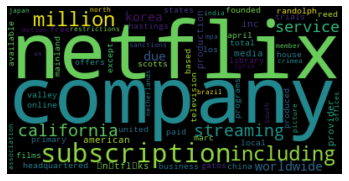

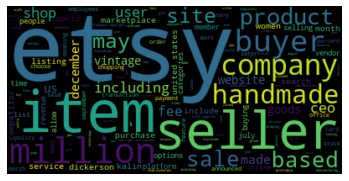

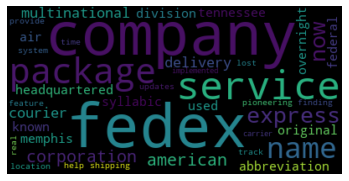

In [3]:
bad_char = ["[1]", '[2]', '[3]', '[4]', '[5]']
text = {}

if not os.path.exists('Figures'):
    os.mkdir('Figures')

for j in output:
    for i in output[j]:
        text[i] = output[j][i]['summary'].strip('\n').lower()
        wordcloud = WordCloud().generate(text[i])

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
    
        plt.savefig(os.path.join('Figures','{}_cloud.jpg'.format(i)), dpi=500)
        plt.show()

In [53]:
text_e = output["competitors"]['Etsy']['summary'].strip('\n').lower()

bad_char = ["[1]", '[2]', '[3]', '[4]', '[5]', ',', '.', '[', ']']

for cha in bad_char:
    text_e = text_e.replace(cha,'')

word_tokens = word_tokenize(text_e) 
  
filtered_sentence = [w for w in word_tokens if not w in stop] 

print(filtered_sentence)


['etsy', 'e-commerce', 'website', 'focused', 'handmade', 'vintage', 'items', 'craft', 'supplies', 'items', 'fall', 'wide', 'range', 'categories', 'including', 'jewellery', 'bags', 'clothing', 'home', 'décor', 'furniture', 'toys', 'art', 'well', 'craft', 'supplies', 'tools', 'vintage', 'items', 'must', 'least', '20', 'years', 'old', 'site', 'follows', 'tradition', 'open', 'craft', 'fairs', 'giving', 'sellers', 'personal', 'storefronts', 'list', 'goods', 'fee', 'us', '$', '020', 'per', 'item', 'december', '31', '2018', 'etsy', '60', 'million', 'items', 'marketplace', 'online', 'marketplace', 'handmade', 'vintage', 'goods', 'connected', '21', 'million', 'sellers', '394', 'million', 'buyers', 'end', '2018', 'etsy', '874', 'employees', '2018', 'etsy', 'total', 'sales', 'gross', 'merchandise', 'sales', '(', 'gms', ')', 'us', '$', '393', 'billion', 'platform', '2018', 'etsy', 'garnered', 'revenue', 'us', '$', '6037', 'million', 'registered', 'net', 'income', 'us', '$', '4125', 'million', 'pla

In [5]:
text_e

"netflix inc (/ˈnɛtflɪks/) is an american media-services provider and production company headquartered in los gatos california founded in 1997 by reed hastings and marc randolph in scotts valley california the company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs including those produced in-house9 as of april 2019 netflix had over 148 million paid subscriptions worldwide including 60\xa0million in the united states and over 154\xa0million subscriptions total including free trials8 it is available worldwide except in mainland china (due to local restrictions) syria north korea and crimea (due to us sanctions) the company also has offices in the netherlands brazil india japan and south korea10 netflix is a member of the motion picture association (mpa)"

In [6]:
import stanfordnlp
stanfordnlp.download('en')


Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
n


In [7]:
nlp = stanfordnlp.Pipeline()#processors = "tokenize,mwt,lemma,pos")


Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pr

In [8]:
import spacy
from spacy import displacy
from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [9]:
doc = nlp(text_e)

2019-11-22 12:36:11 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



In [10]:
print([(X.text, X.label_) for X in doc.ents])

AttributeError: 'Document' object has no attribute 'ents'

In [11]:
#dictionary that contains pos tags and their explanations
pos_dict = {
'CC': 'coordinating conjunction','CD': 'cardinal digit','DT': 'determiner',
'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
'FW': 'foreign word','IN':  'preposition/subordinating conjunction','JJ': 'adjective \'big\'',
'JJR': 'adjective, comparative \'bigger\'','JJS': 'adjective, superlative \'biggest\'',
'LS': 'list marker 1)','MD': 'modal could, will','NN': 'noun, singular \'desk\'',
'NNS': 'noun plural \'desks\'','NNP': 'proper noun, singular \'Harrison\'',
'NNPS': 'proper noun, plural \'Americans\'','PDT': 'predeterminer \'all the kids\'',
'POS': 'possessive ending parent\'s','PRP': 'personal pronoun I, he, she',
'PRP$': 'possessive pronoun my, his, hers','RB': 'adverb very, silently,',
'RBR': 'adverb, comparative better','RBS': 'adverb, superlative best',
'RP': 'particle give up','TO': 'to go \'to\' the store.','UH': 'interjection errrrrrrrm',
'VB': 'verb, base form take','VBD': 'verb, past tense took',
'VBG': 'verb, gerund/present participle taking','VBN': 'verb, past participle taken',
'VBP': 'verb, sing. present, non-3d take','VBZ': 'verb, 3rd person sing. present takes',
'WDT': 'wh-determiner which','WP': 'wh-pronoun who, what','WP$': 'possessive wh-pronoun whose',
'WRB': 'wh-abverb where, when','QF' : 'quantifier, bahut, thoda, kam (Hindi)','VM' : 'main verb',
'PSP' : 'postposition, common in indian langs','DEM' : 'demonstrative, common in indian langs'
}

In [12]:
#extract parts of speech
def extract_pos(doc):
    parsed_text = {'word':[], 'pos':[], 'exp':[]}
    for sent in doc.sentences:
        for wrd in sent.words:
            if wrd.pos in pos_dict.keys():
                pos_exp = pos_dict[wrd.pos]
            else:
                pos_exp = 'NA'
            parsed_text['word'].append(wrd.text)
            parsed_text['pos'].append(wrd.pos)
            parsed_text['exp'].append(pos_exp)
    #return a dataframe of pos and text
    return pd.DataFrame(parsed_text)

#extract pos
pos_df = extract_pos(doc)

In [15]:
pos_df[pos_df['pos'] == 'NN']

,word,pos,exp
0,netflix,NN,"noun, singular 'desk'"
10,media-,NN,"noun, singular 'desk'"
12,provider,NN,"noun, singular 'desk'"
14,production,NN,"noun, singular 'desk'"
15,company,NN,"noun, singular 'desk'"
32,valley,NN,"noun, singular 'desk'"
35,company,NN,"noun, singular 'desk'"
38,business,NN,"noun, singular 'desk'"
41,subscription,NN,"noun, singular 'desk'"
44,streaming,NN,"noun, singular 'desk'"


In [16]:
doc.sentences[0].print_dependencies()

('netflix', '2', 'compound')
('inc', '16', 'nsubj')
('(', '2', 'punct')
('/', '5', 'punct')
('ˈnɛtflɪks', '2', 'appos')
('/', '5', 'punct')
(')', '5', 'punct')
('is', '16', 'cop')
('an', '16', 'det')
('american', '16', 'amod')
('media-', '12', 'compound')
('services', '13', 'compound')
('provider', '16', 'compound')
('and', '15', 'cc')
('production', '13', 'conj')
('company', '0', 'root')
('headquartered', '16', 'acl')
('in', '21', 'case')
('los', '21', 'compound')
('gatos', '21', 'compound')
('california', '17', 'obl')
('founded', '17', 'xcomp')
('in', '24', 'case')
('1997', '22', 'obl')
('by', '26', 'case')
('reed', '22', 'obl')
('hastings', '26', 'flat')
('and', '29', 'cc')
('marc', '27', 'conj')
('randolph', '29', 'flat')
('in', '33', 'case')
('scotts', '33', 'compound')
('valley', '29', 'nmod')
('california', '33', 'appos')
('the', '36', 'det')
('company', '39', 'nmod:poss')
("'s", '36', 'case')
('primary', '39', 'amod')
('business', '34', 'appos')
('is', '46', 'cop')
('its', '46'

In [17]:
pos_df.head(50)

,word,pos,exp
0,netflix,NN,"noun, singular 'desk'"
1,inc,NNP,"proper noun, singular 'Harrison'"
2,(,-LRB-,NA
3,/,",",NA
4,ˈnɛtflɪks,NNS,noun plural 'desks'
5,/,",",NA
6,),-RRB-,NA
7,is,VBZ,"verb, 3rd person sing. present takes"
8,an,DT,determiner
9,american,JJ,adjective 'big'


In [18]:
pos_dict = {'CC': 'coordinating conjunction', 'CD': 'cardinal digit', 'DT': 'determiner',
                'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
                'FW': 'foreign word', 'IN': 'preposition/subordinating conjunction', 'JJ': 'adjective \'big\'',
                'JJR': 'adjective, comparative \'bigger\'', 'JJS': 'adjective, superlative \'biggest\'',
                'LS': 'list marker 1)', 'MD': 'modal could, will', 'NN': 'noun, singular \'desk\'',
                'NNS': 'noun plural \'desks\'', 'NNP': 'proper noun, singular \'Harrison\'',
                'NNPS': 'proper noun, plural \'Americans\'', 'PDT': 'predeterminer \'all the kids\'',
                'POS': 'possessive ending parent\'s', 'PRP': 'personal pronoun I, he, she',
                'PRP$': 'possessive pronoun my, his, hers', 'RB': 'adverb very, silently,',
                'RBR': 'adverb, comparative better', 'RBS': 'adverb, superlative best',
                'RP': 'particle give up', 'TO': 'to go \'to\' the store.', 'UH': 'interjection errrrrrrrm',
                'VB': 'verb, base form take', 'VBD': 'verb, past tense took',
                'VBG': 'verb, gerund/present participle taking', 'VBN': 'verb, past participle taken',
                'VBP': 'verb, sing. present, non-3d take', 'VBZ': 'verb, 3rd person sing. present takes',
                'WDT': 'wh-determiner which', 'WP': 'wh-pronoun who, what', 'WP$': 'possessive wh-pronoun whose',
                'WRB': 'wh-abverb where, when', 'QF': 'quantifier, bahut, thoda, kam (Hindi)', 'VM': 'main verb',
                'PSP': 'postposition, common in indian langs', 'DEM': 'demonstrative, common in indian langs'
                }

    # extract parts of speech
def extract_pos(doc):
    parsed_text = {'word': [], 'pos': [], 'exp': []}
    for sent in doc.sentences:
        for wrd in sent.words:
            if wrd.pos in pos_dict.keys():
                pos_exp = pos_dict[wrd.pos]
            else:
                pos_exp = 'NA'
            parsed_text['word'].append(wrd.text)
            parsed_text['pos'].append(wrd.pos)
            parsed_text['exp'].append(pos_exp)
    # return a dataframe of pos and text
    return pd.DataFrame(parsed_text)

In [19]:
import pandas as pd
import stanfordnlp
stanfordnlp.download('en')
nlp = stanfordnlp.Pipeline()

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
n
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/bond/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/bond/stanfordnlp_

In [23]:
NN_df = {}
for j in output:
    for i in output[j]:
        text_e = output[j][i]['summary'].strip('\n').lower()
        doc = nlp(text_e)
        #extract pos
        pos_df = extract_pos(doc)

        NN_df[i] = pos_df[pos_df['pos'] == 'NN']
        print(NN_df[i])
        for row in NN_df[i]:
            try:
                if row in output[j][i]['founder']:
                    NN_df[i].drop(row, axis=0, inplace=True)
            except:
                pass

2019-11-22 12:41:11 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



          word pos                    exp
0   zappos.com  NN  noun, singular 'desk'
4         shoe  NN  noun, singular 'desk'
6     clothing  NN  noun, singular 'desk'
7     retailer  NN  noun, singular 'desk'
21     company  NN  noun, singular 'desk'
28    swinmurn  NN  noun, singular 'desk'
33      domain  NN  noun, singular 'desk'
34        name  NN  noun, singular 'desk'
48       stock  NN  noun, singular 'desk'
49        deal  NN  noun, singular 'desk'
57        time  NN  noun, singular 'desk'


2019-11-22 12:41:11 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



          word pos                    exp
0         woot  NN  noun, singular 'desk'
8     internet  NN  noun, singular 'desk'
9     retailer  NN  noun, singular 'desk'
14      suburb  NN  noun, singular 'desk'
23  wholesaler  NN  noun, singular 'desk'
41     website  NN  noun, singular 'desk'
47     product  NN  noun, singular 'desk'
49         day  NN  noun, singular 'desk'
53       piece  NN  noun, singular 'desk'
55    computer  NN  noun, singular 'desk'
56    hardware  NN  noun, singular 'desk'
60      gadget  NN  noun, singular 'desk'
63        woot  NN  noun, singular 'desk'
71        wine  NN  noun, singular 'desk'
77   household  NN  noun, singular 'desk'
96   agreement  NN  noun, singular 'desk'


2019-11-22 12:41:11 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



           word pos                    exp
2        market  NN  noun, singular 'desk'
8   supermarket  NN  noun, singular 'desk'
9         chain  NN  noun, singular 'desk'
37         usda  NN  noun, singular 'desk'
40       grocer  NN  noun, singular 'desk'
47        chain  NN  noun, singular 'desk'
70      kingdom  NN  noun, singular 'desk'
78       update  NN  noun, singular 'desk'


2019-11-22 12:41:12 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



             word pos                    exp
0         netflix  NN  noun, singular 'desk'
11          media  NN  noun, singular 'desk'
14       provider  NN  noun, singular 'desk'
16     production  NN  noun, singular 'desk'
17        company  NN  noun, singular 'desk'
36         valley  NN  noun, singular 'desk'
41        company  NN  noun, singular 'desk'
44       business  NN  noun, singular 'desk'
47   subscription  NN  noun, singular 'desk'
50      streaming  NN  noun, singular 'desk'
51        service  NN  noun, singular 'desk'
55      streaming  NN  noun, singular 'desk'
58        library  NN  noun, singular 'desk'
62     television  NN  noun, singular 'desk'
70          house  NN  noun, singular 'desk'
80        netflix  NN  noun, singular 'desk'
116      mainland  NN  noun, singular 'desk'
140       company  NN  noun, singular 'desk'
161       netflix  NN  noun, singular 'desk'
164        member  NN  noun, singular 'desk'
167        motion  NN  noun, singular 'desk'
168       

2019-11-22 12:41:27 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



               word pos                    exp
0              etsy  NN  noun, singular 'desk'
3        e-commerce  NN  noun, singular 'desk'
4           website  NN  noun, singular 'desk'
12            craft  NN  noun, singular 'desk'
21            range  NN  noun, singular 'desk'
...             ...  ..                    ...
3566           etsy  NN  noun, singular 'desk'
3574         person  NN  noun, singular 'desk'
3590           etsy  NN  noun, singular 'desk'
3591  manufacturing  NN  noun, singular 'desk'
3598            use  NN  noun, singular 'desk'

[601 rows x 3 columns]


2019-11-22 12:41:31 [py.warnings] WARNING: ../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.



             word pos                    exp
0           fedex  NN  noun, singular 'desk'
1     corporation  NN  noun, singular 'desk'
6         courier  NN  noun, singular 'desk'
7        delivery  NN  noun, singular 'desk'
9         company  NN  noun, singular 'desk'
20           name  NN  noun, singular 'desk'
22          fedex  NN  noun, singular 'desk'
27   abbreviation  NN  noun, singular 'desk'
30           name  NN  noun, singular 'desk'
33        company  NN  noun, singular 'desk'
36            air  NN  noun, singular 'desk'
37       division  NN  noun, singular 'desk'
40        express  NN  noun, singular 'desk'
43          fedex  NN  noun, singular 'desk'
44        express  NN  noun, singular 'desk'
56        company  NN  noun, singular 'desk'
62       shipping  NN  noun, singular 'desk'
63        service  NN  noun, singular 'desk'
67         system  NN  noun, singular 'desk'
76           time  NN  noun, singular 'desk'
79        package  NN  noun, singular 'desk'
80       l

In [22]:
output['acquisitions']['Woot']['founder'].lower().split()

['matt', 'rutledge']

In [50]:
NN_df['Woot']

,word,pos,exp
13,dallas,NNP,"proper noun, singular 'Harrison'"
16,carrollton,NNP,"proper noun, singular 'Harrison'"
18,texas,NNP,"proper noun, singular 'Harrison'"
24,matt,NNP,"proper noun, singular 'Harrison'"
25,rutledge,NNP,"proper noun, singular 'Harrison'"
30,july,NNP,"proper noun, singular 'Harrison'"
38,woot,NNP,"proper noun, singular 'Harrison'"
88,june,NNP,"proper noun, singular 'Harrison'"
93,woot,NNP,"proper noun, singular 'Harrison'"
101,amazon,NNP,"proper noun, singular 'Harrison'"


In [53]:
for row in NN_df['Woot']['word']:
    NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != 'woot']
    NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != 'amazon']
    if row in output['acquisitions']['Woot']['founder'].lower().split():
        NN_df['Woot'] = NN_df['Woot'][NN_df['Woot']['word'] != row]
NN_df['Woot']

,word,pos,exp
13,dallas,NNP,"proper noun, singular 'Harrison'"
16,carrollton,NNP,"proper noun, singular 'Harrison'"
18,texas,NNP,"proper noun, singular 'Harrison'"
30,july,NNP,"proper noun, singular 'Harrison'"
88,june,NNP,"proper noun, singular 'Harrison'"


In [34]:
output['acquisitions']['Woot']['founder'].lower().split()

list

In [47]:
NN_df['Woot'].index(NN_df['Woot']['word'] == 'matt')

TypeError: 'Int64Index' object is not callable

In [27]:
doc

fedex corporation is an american multinational courier delivery services company headquartered in memphis, tennessee.[2] the name "fedex" is a syllabic abbreviation of the name of the company's original air division, federal express (now fedex express), which was used from 1973 until 2000.  the company is known for its overnight shipping service and pioneering a system that could track packages and provide real-time updates on package location (to help in finding lost packages), a feature that has now been implemented by most other carrier services.[3]

### Spacy example

In [174]:
text_amazon = """
Amazon.com, Inc.[6] (/ˈæməzɒn/), is an American multinational technology company based in Seattle, Washington, that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It is considered one of the Big Four technology companies along with Google, Apple, and Facebook.[7][8][9]

Amazon is known for its disruption of well-established industries through technological innovation and mass scale.[10][11][12] It is the world's largest e-commerce marketplace, AI assistant provider, and cloud computing platform[13] as measured by revenue and market capitalization.[14] Amazon is the largest Internet company by revenue in the world.[15] It is the second largest private employer in the United States[16] and one of the world's most valuable companies. Amazon is the second largest technology company by revenue.

Amazon was founded by Jeff Bezos on July 5, 1994, in Bellevue, Washington. The company initially started as an online marketplace for books but later expanded to sell electronics, software, video games, apparel, furniture, food, toys, and jewelry. In 2015, Amazon surpassed Walmart as the most valuable retailer in the United States by market capitalization.[17] In 2017, Amazon acquired Whole Foods Market for $13.4 billion, which vastly increased Amazon's presence as a brick-and-mortar retailer.[18] In 2018, Bezos announced that its two-day delivery service, Amazon Prime, had surpassed 100 million subscribers worldwide.[19][20]

Amazon distributes downloads and streaming of video, music, audiobook through its Amazon Prime Video, Amazon Music, and Audible subsidiaries. Amazon also has a publishing arm, Amazon Publishing, a film and television studio, Amazon Studios, and a cloud computing subsidiary, Amazon Web Services. It produces consumer electronics including Kindle e-readers, Fire tablets, Fire TV, and Echo devices. In addition, Amazon subsidiaries include Ring, Twitch.tv, Whole Foods Market, and IMDb. Among various controversies, the company has been criticized for technological surveillance overreach,[21] a hyper-competitive and demanding work culture,[22] tax avoidance,[23] and anti-competitive practices.[24]

In 1994, Jeff Bezos incorporated Amazon. He chose the location Seattle because of technical talent as Microsoft is located there.[25] In May 1997, the organization went public. The company began selling music and videos in 1998, at which time it began operations internationally by acquiring online sellers of books in United Kingdom and Germany. The following year, the organization also sold video games, consumer electronics, home-improvement items, software, games, and toys in addition to other items.

In 2002, the corporation started Amazon Web Services (AWS), which provided data on Web site popularity, Internet traffic patterns and other statistics for marketers and developers. In 2006, the organization grew its AWS portfolio when Elastic Compute Cloud (EC2), which rents computer processing power as well as Simple Storage Service (S3), that rents data storage via the Internet, were made available. That same year, the company started Fulfillment by Amazon which managed the inventory of individuals and small companies selling their belongings through the company internet site. In 2012, Amazon bought Kiva Systems to automate its inventory-management business, purchasing Whole Foods Market supermarket chain five years later in 2017.[26]

In 2000, U.S. toy retailer Toys "R" Us entered into a 10-year agreement with Amazon, valued at $50 million per year plus a cut of sales, under which Toys "R" Us would be the exclusive supplier of toys and baby products on the service, and the chain's website would redirect to Amazon's Toys & Games category. In 2004, Toys "R" Us sued Amazon, claiming that because of a perceived lack of variety in Toys "R" Us stock, Amazon had knowingly allowed third-party sellers to offer items on the service in categories that Toys "R" Us had been granted exclusivity. In 2006, a court ruled in favor of Toys "R" Us, giving it the right to unwind its agreement with Amazon and establish its own independent e-commerce website. The company was later awarded $51 million in damages.[28][29][30]

In 2001, Amazon entered into a similar agreement with Borders Group, under which Amazon would comanage Borders.com as a co-branded service.[31] Borders pulled out of the arrangement in 2007, with plans to also launch its own online store.[32]

On October 18, 2011, Amazon.com announced a partnership with DC Comics for the exclusive digital rights to many popular comics, including Superman, Batman, Green Lantern, The Sandman, and Watchmen. The partnership has caused well-known bookstores like Barnes & Noble to remove these titles from their shelves.[33]

In November 2013, Amazon announced a partnership with the United States Postal Service to begin delivering orders on Sundays. The service, included in Amazon's standard shipping rates, initiated in metropolitan areas of Los Angeles and New York because of the high-volume and inability to deliver in a timely way, with plans to expand into Dallas, Houston, New Orleans and Phoenix by 2014.[34]

In June 2017, Nike confirmed a "pilot" partnership with Amazon to sell goods directly on the platform.[35][36][37]

As of October 11, 2017, AmazonFresh sold a range of Booths branded products for home delivery in selected areas.[38]

In September 2017, Amazon ventured with one of its sellers JV Appario Retail owned by Patni Group which has recorded a total income of US$ 104.44 million (₹ 759 crore) in financial year 2017–18.[39]

In November 2018, Amazon reached an agreement with Apple Inc. to sell selected products through the service, via the company and selected Apple Authorized Resellers. As a result of this partnership, only Apple Authorized Resellers may sell Apple products on Amazon effective January 4, 2019.[40][41]

Amazon.com's product lines available at its website include several media (books, DVDs, music CDs, videotapes and software), apparel, baby products, consumer electronics, beauty products, gourmet food, groceries, health and personal-care items, industrial & scientific supplies, kitchen items, jewelry, watches, lawn and garden items, musical instruments, sporting goods, tools, automotive items and toys & games.[citation needed] In August 2019, Amazon applied to have a liquor store in San Francisco, CA as a means to ship beer and alcohol within the city.[42] Amazon has separate retail websites for some countries and also offers international shipping of some of its products to certain other countries.[43]

Amazon.com has a number of products and services available, including:

AmazonFresh
Amazon Prime
Amazon Web Services
Alexa
Appstore
Amazon Drive
Echo
Kindle
Fire tablets
Fire TV
Video
Kindle Store
Music
Music Unlimited
Amazon Digital Game Store
Amazon Studios
AmazonWireless



"""
bad_char = []
for i in range(90):
    bad_char.append(str('[' + str(i) + ']'))

# bad_char = ["[1]", '[2]', '[3]', '[4]', '[5]', ]

for cha in bad_char:
    text_amazon = text_amazon.replace(cha,'')

In [175]:
bad_char

['[0]',
 '[1]',
 '[2]',
 '[3]',
 '[4]',
 '[5]',
 '[6]',
 '[7]',
 '[8]',
 '[9]',
 '[10]',
 '[11]',
 '[12]',
 '[13]',
 '[14]',
 '[15]',
 '[16]',
 '[17]',
 '[18]',
 '[19]',
 '[20]',
 '[21]',
 '[22]',
 '[23]',
 '[24]',
 '[25]',
 '[26]',
 '[27]',
 '[28]',
 '[29]',
 '[30]',
 '[31]',
 '[32]',
 '[33]',
 '[34]',
 '[35]',
 '[36]',
 '[37]',
 '[38]',
 '[39]',
 '[40]',
 '[41]',
 '[42]',
 '[43]',
 '[44]',
 '[45]',
 '[46]',
 '[47]',
 '[48]',
 '[49]',
 '[50]',
 '[51]',
 '[52]',
 '[53]',
 '[54]',
 '[55]',
 '[56]',
 '[57]',
 '[58]',
 '[59]',
 '[60]',
 '[61]',
 '[62]',
 '[63]',
 '[64]',
 '[65]',
 '[66]',
 '[67]',
 '[68]',
 '[69]',
 '[70]',
 '[71]',
 '[72]',
 '[73]',
 '[74]',
 '[75]',
 '[76]',
 '[77]',
 '[78]',
 '[79]',
 '[80]',
 '[81]',
 '[82]',
 '[83]',
 '[84]',
 '[85]',
 '[86]',
 '[87]',
 '[88]',
 '[89]']

In [176]:
doc = nlp(text_amazon)

In [177]:
import spacy
nlp = spacy.load('en_core_web_sm')

# doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)


 ... 
Amazon.com ... ROOT
, ... punct
Inc. ... npadvmod
( ... punct
/ˈæməzɒn/ ... parataxis
) ... punct
, ... punct
is ... ROOT
an ... det
American ... amod
multinational ... amod
technology ... compound
company ... attr
based ... acl
in ... prep
Seattle ... pobj
, ... punct
Washington ... appos
, ... punct
that ... nsubj
focuses ... relcl
on ... prep
e ... compound
- ... punct
commerce ... pobj
, ... punct
cloud ... compound
computing ... conj
, ... punct
digital ... amod
streaming ... conj
, ... punct
and ... cc
artificial ... amod
intelligence ... conj
. ... punct
It ... nsubjpass
is ... auxpass
considered ... ROOT
one ... oprd
of ... prep
the ... det
Big ... compound
Four ... compound
technology ... compound
companies ... pobj
along ... prep
with ... prep
Google ... pobj
, ... punct
Apple ... conj
, ... punct
and ... cc
Facebook ... conj
. ... punct


 ... 
Amazon ... nsubjpass
is ... auxpass
known ... ROOT
for ... prep
its ... poss
disruption ... pobj
of ... prep
well ... advmod


U.S. ... compound
toy ... compound
retailer ... nmod
Toys ... nmod
" ... punct
R ... nmod
" ... punct
Us ... nsubj
entered ... ROOT
into ... prep
a ... det
10-year ... amod
agreement ... pobj
with ... prep
Amazon ... pobj
, ... punct
valued ... acl
at ... prep
$ ... quantmod
50 ... compound
million ... pobj
per ... prep
year ... pobj
plus ... cc
a ... det
cut ... conj
of ... prep
sales ... pobj
, ... punct
under ... prep
which ... pobj
Toys ... nmod
" ... punct
R ... nmod
" ... punct
Us ... nsubj
would ... aux
be ... relcl
the ... det
exclusive ... amod
supplier ... attr
of ... prep
toys ... pobj
and ... cc
baby ... compound
products ... conj
on ... prep
the ... det
service ... pobj
, ... punct
and ... cc
the ... det
chain ... poss
's ... case
website ... nsubj
would ... aux
redirect ... conj
to ... prep
Amazon ... poss
's ... case
Toys ... nmod
& ... cc
Games ... conj
category ... pobj
. ... punct
In ... prep
2004 ... pobj
, ... punct
Toys ... nmod
" ... punct
R ... nmod
" ... punct
U

In [178]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

2019-11-22 13:31:40 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [179]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [180]:
sentences = [sent.string.strip() for sent in doc.sents]

In [181]:
relations = [get_relation(i) for i in tqdm(sentences)]

100%|██████████| 51/51 [00:00<00:00, 106.17it/s]


In [182]:
entity_pairs = []

for i in tqdm(sentences):
  entity_pairs.append(get_entities(i))

100%|██████████| 51/51 [00:00<00:00, 102.04it/s]


In [183]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [184]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})


In [185]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

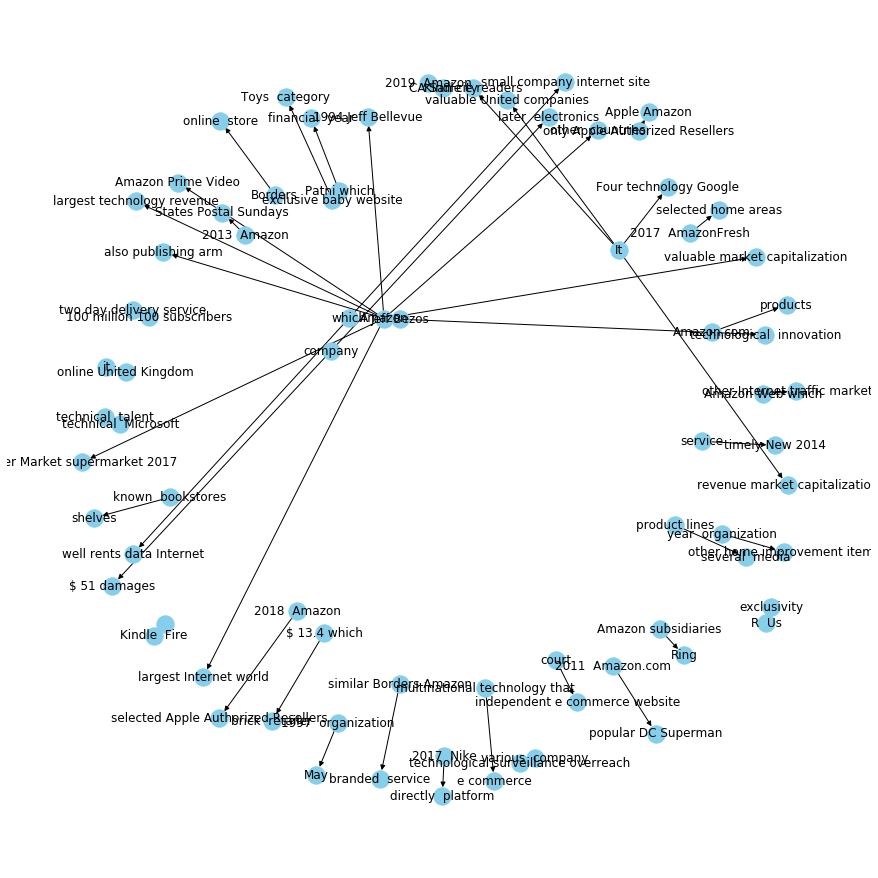

In [186]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [188]:
output = zip(source, relations, target)

In [189]:
list(output)

[('', 'Amazon.com', ''),
 ('multinational technology that', 'is', 'e commerce'),
 ('It', 'considered', 'Four technology Google'),
 ('Amazon', 'known for its', 'technological  innovation'),
 ('It', 'is', 'revenue market capitalization'),
 ('Amazon', 'is', 'largest Internet world'),
 ('It', 'is', 'valuable United companies'),
 ('Amazon', 'is', 'largest technology revenue'),
 ('Amazon', 'founded by', '1994 Jeff Bellevue'),
 ('company', 'started as', 'later  electronics'),
 ('Amazon', 'surpassed', 'valuable market capitalization'),
 ('$ 13.4 which', 'acquired', 'brick  retailer'),
 ('two day delivery service', 'announced', '100 million 100 subscribers'),
 ('Amazon', 'distributes', 'Amazon Prime Video'),
 ('Amazon', 'has', 'also publishing arm'),
 ('It', 'produces', 'Kindle e readers'),
 ('Amazon subsidiaries', 'include', 'Ring'),
 ('various  company',
  'criticized for technological',
  'technological surveillance overreach'),
 ('Jeff Bezos', 'incorporated', 'Amazon'),
 ('technical  Micros